# FIR Filter

In [14]:
import pandas as pd
import os
import scipy.cluster
from scipy import signal
import numpy as np

from tqdm.notebook import tqdm

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

## Excelファイルの読み込み＆保存設定

In [21]:
dir = "folder"

load_name = os.listdir(dir)[0]
save_name = "save.xlsx"

load_path = os.path.join(dir,load_name)
save_path = os.path.join(dir,save_name)

# Excelファイルの読み込み

In [22]:
table  = pd.read_excel(load_path, engine="openpyxl") #Excelファイルを読み込む

In [24]:
table

,02:42:45,17623
0,02:42:46,17770
1,02:42:46,17980
2,02:42:46,18499
3,02:42:46,16608
4,02:42:47,15313
...,...,...
140802,06:47:41,16833
140803,06:47:41,18913
140804,06:47:41,18913
140805,06:47:42,15748


## listに変換してnumpy配列に変換

In [61]:
x1 = table[17623].to_list() #[17259]の部分に読み込む行名を入力
x2 = np.array(x1)  #リスト化しナムパイ化

t1 = table["02:42:45"].to_list() #2個目の要素があれば読み込む
t2 = np.array(t1)  #リスト化しナムパイ化

array(['02:42:46', '02:42:46', '02:42:46', ..., '06:47:41', '06:47:42',
       '06:47:42'], dtype='<U8')

## フィルター例1(保存なし)

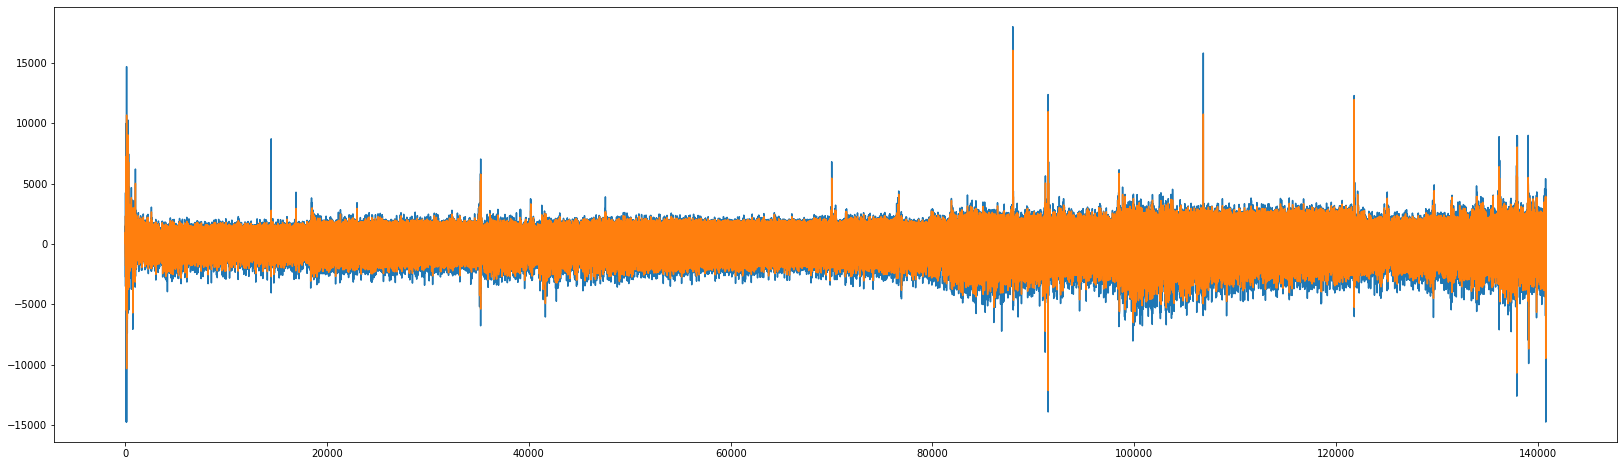

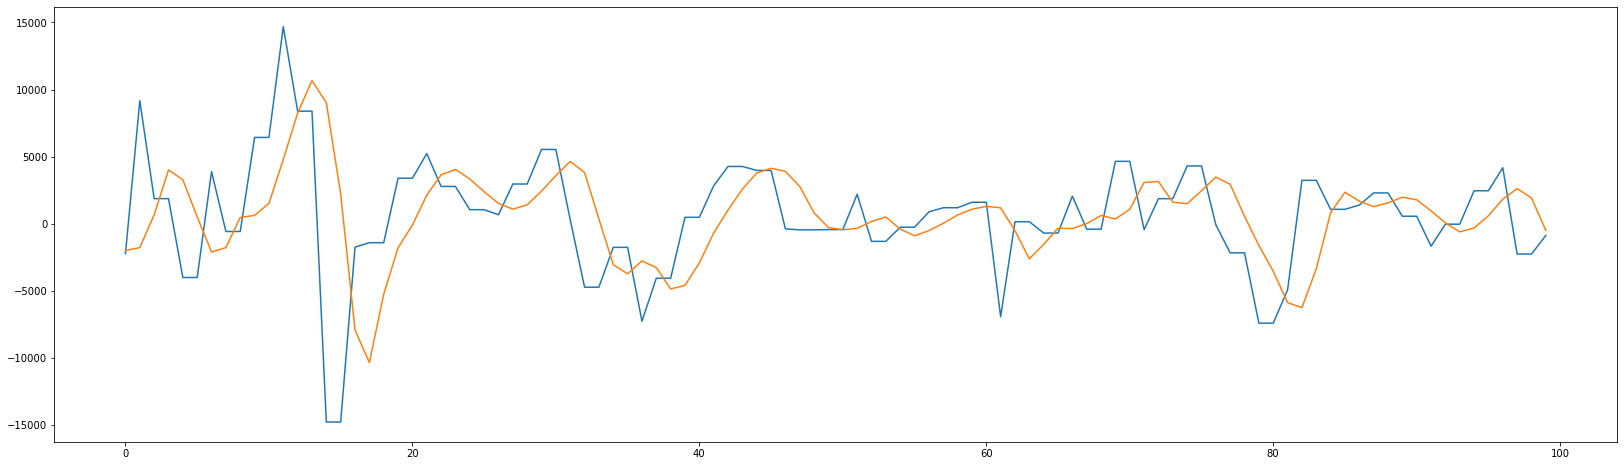

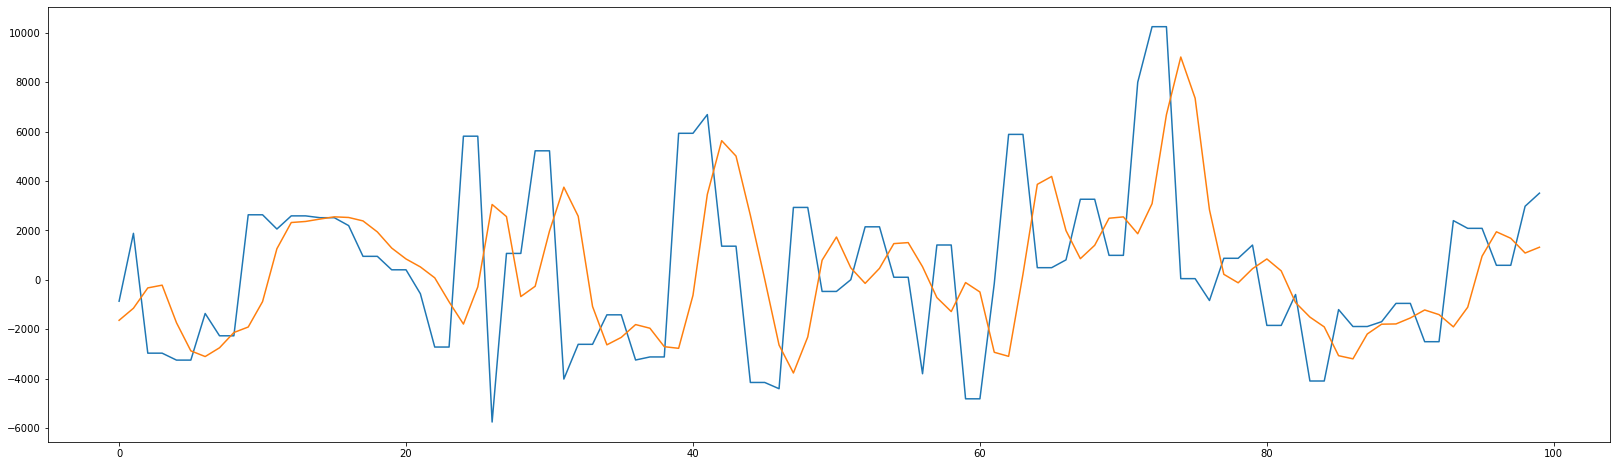

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import statistics
import openpyxl

N = 1024            # サンプル数
dt = 0.1          # サンプリング周期 [s]

filter1 = signal.firwin(numtaps=5, cutoff=0.25, fs=1/dt)
y1 = signal.lfilter(filter1, 1, x2-17000)

plt.figure(figsize=(28, 8))
plt.plot(x2-17000)
plt.plot(y1)

for i in range(1,3):
    plt.figure(figsize=(28, 8))
    plt.plot(x2[100*i:100+100*i]-17000)
    plt.plot(y1[100*i:100+100*i])



## フィルター例2(保存あり)

In [64]:
filter1 = signal.firwin(numtaps = 100, cutoff = [0.8,2], fs=1/dt, pass_zero=False)
y2 = signal.lfilter(filter1, 1, x2-17000)

wb = openpyxl.Workbook()
ws = wb.active


for i in range(len(y2)):
    ws.cell(column=1, row=i+1).value = (t2[i])  
    ws.cell(column=2, row=i+1).value = (y2[i])  

wb.save(save_path)#処理後のデータを保存するExcelファイルを作成)